In [1]:
import torch
import numpy as np

from data import Interval, Function, Data
from model import FCNet
from solver import FunctionApproximator
from plotting import BasePlotter

device = torch.device('cpu')

Function to approximate

$y(x) = \text{sin}(x)$

In [2]:
def f(x):
    return torch.sin(x)

func = Function(function=f)

In [3]:
features_in = 1
features_out = 1
hidden = [4]

model = FCNet(features_in, hidden, features_out, activation='relu', init_weights=False)

domain = Interval(-np.pi, np.pi, steps=1000)
data = Data(domain, solutions=func)

solver = FunctionApproximator(model, data, device=device)
solver.compile('adam', lr=1e-2)
losses = solver.train(num_epochs=100, atol=1e-3, save_gif=True)
solver.create_gif(gif_save_path='gif_test4')

Training Progress: 100%|██████████████████████████| 100/100 [00:00<00:00, 135.74it/s, Loss: 0.03448303 | LR: 0.01000000]


GIF saved at gif_test4/relu_4.gif


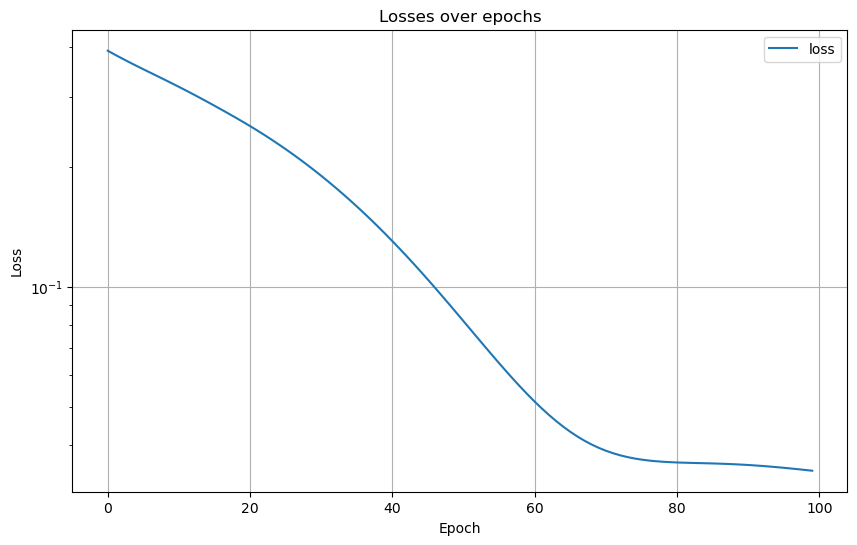

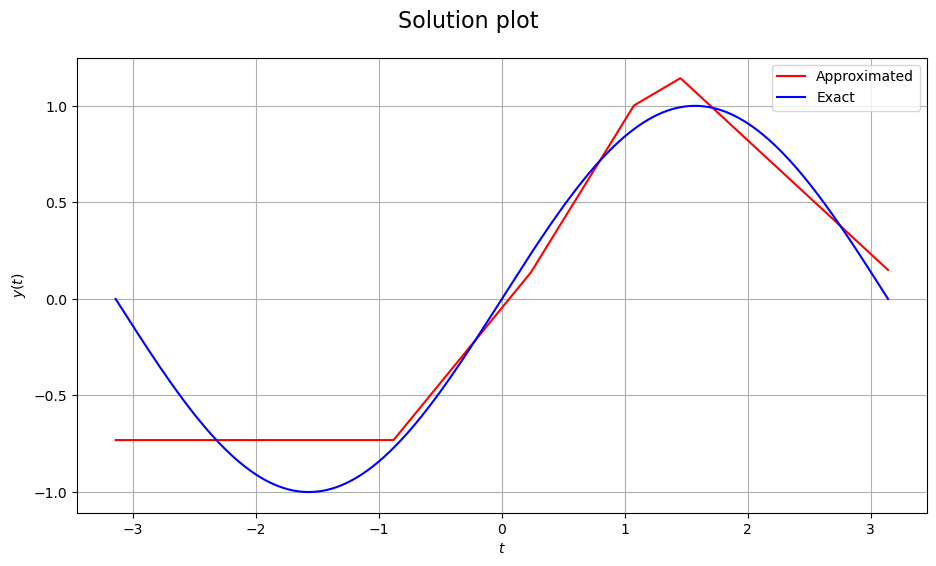

In [4]:
plot = BasePlotter(solver)
plot.losses(losses)
plot.numerical_solution()

In [5]:
solver.evaluate(value=np.pi/2)

Model parameter count: 13
--- At t = 1.5708 ---
Solution | Computed: 1.0743, Exact: 1.0000, Abs Error: 0.0743

